In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,Dataset



In [6]:
# run on gpu if available.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [39]:
#hyper_parameters

input_size = 28*28
hidden_size = 128
num_classes = 10              # since we r training on MNIST dataset
num_epochs = 5
batchsize = 128
learning_rate = 0.01


In [40]:
#MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
    )

test_dataset = torchvision.datasets.MNIST(
    root = './data',
    train = False,
    transform = transforms.ToTensor()                      # can declare custom transform = transforms.compose([transforms.ToTensor()])
    )

In [41]:
train_loader = DataLoader(dataset = train_dataset, batch_size=batchsize, shuffle=True)

test_loader = DataLoader(dataset=test_dataset, shuffle=False, batch_size=batchsize)

examples = iter(train_loader)
samples,labels = next(examples)           # same as examples.__next()__ for better readability. 

print(samples.shape, labels.shape)


torch.Size([128, 1, 28, 28]) torch.Size([128])


size of samples is 128, 1, 28, 28 : 

128 for the number of samples in that batch.
1 for the colour scale used (here grayscale : 0 for black to 255 for white)
28 * 28 is the pixel matrix. 


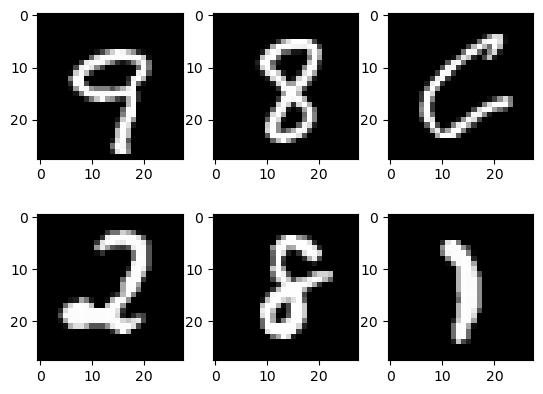

In [42]:
# see data visually 

for i in range(6):
    plt.subplot(2,3,i+1)                  # plt.subplot(rows,columns,index)
    plt.imshow(samples[i][0],cmap='gray')   # plt.imshow(samples[i][0]) = u know already from above
plt.show()

In [43]:
#Now 
# Write the model
# train it
# test it 

# MODEL

class NeuralNet(nn.Module):
    def __init__(self, inputsize, hiddensize, numclasses):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

# initialise the model

model = NeuralNet(inputsize=input_size,hiddensize=hidden_size,numclasses=num_classes)

        

In [44]:
#loss and optimizer 

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)        # remember we have to specify parameters and lr in optim.


# training

total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)          # reshape from 100*1*28*28 to -1,784 our input size.
        labels = labels.to(device)
        
        
        #forward pass : calculate loss
        outputs = model(images)
        loss = criterion(outputs,labels)                   # cross entropy loss does everything : one hot encoding, softmax and then calculation of loss itself - builtin pytorch 
        
        #backward pass
        optimizer.zero_grad()                  # resets gradients to zero  after every epoch because remember where gradients are stored in pytorch grad attribute of each attribute.
        loss.backward()                         # calculates gradients 
        optimizer.step()                       # update weights
        
        if ((i+1)%100 == 0):
            print(f'epoch {epoch+1}/{num_epochs} , step {i+1}/{total_steps}, loss = {loss : .3f}')
        
        
        
        


epoch 1/5 , step 100/469, loss =  0.178
epoch 1/5 , step 200/469, loss =  0.115
epoch 1/5 , step 300/469, loss =  0.117
epoch 1/5 , step 400/469, loss =  0.277
epoch 2/5 , step 100/469, loss =  0.103
epoch 2/5 , step 200/469, loss =  0.099
epoch 2/5 , step 300/469, loss =  0.103
epoch 2/5 , step 400/469, loss =  0.258
epoch 3/5 , step 100/469, loss =  0.038
epoch 3/5 , step 200/469, loss =  0.056
epoch 3/5 , step 300/469, loss =  0.129
epoch 3/5 , step 400/469, loss =  0.089
epoch 4/5 , step 100/469, loss =  0.032
epoch 4/5 , step 200/469, loss =  0.065
epoch 4/5 , step 300/469, loss =  0.059
epoch 4/5 , step 400/469, loss =  0.100
epoch 5/5 , step 100/469, loss =  0.096
epoch 5/5 , step 200/469, loss =  0.089
epoch 5/5 , step 300/469, loss =  0.072
epoch 5/5 , step 400/469, loss =  0.051


In [46]:
#test 

with torch.no_grad():                 # in testing no need to calculate gradients or update weights
    n_samples = 0
    n_correct = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28)
        labels = labels.to(device)
        outputs = model(images)
        
        _,predictions = torch.max(outputs,dim=1)        # max returns two values the max value and the index of prediction so we need the index only hence we use random variable '_'. 
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum()
        
    acc = 100*n_correct/n_samples
    print(acc)
    

tensor(97.1000)
